# LOAD DATASET

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('Laptop_cleaned.csv')
df.head()

,Brand,Model,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Price
0,DELL,Inspiron,i3,11th,8.0,1 TB HDD,Windows 11 Home,39040
1,DELL,Vostro,i5,11th,8.0,1 TB HDD,Windows 10 Home,50840
2,ASUS,Vivobook,i3,10th,8.0,512 GB SSD,Windows 11 Home,37940
3,DELL,Inspiron,i3,11th,8.0,1 TB HDD,Windows 11 Home,44440
4,ASUS,Tuf,i5,10th,8.0,512 GB SSD,Windows 10 Home,57940


### Encodign string to integer

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns_to_encode = [col for col in df.columns if col not in ['Price']]
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])
df.head()


,Brand,Model,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Price
0,2,12,11,1,1,0,3,39040
1,2,28,12,1,1,0,2,50840
2,1,27,11,0,1,4,3,37940
3,2,12,11,1,1,0,3,44440
4,1,25,12,0,1,4,2,57940


Now, let's split the dataset into features (X) and result (y).

In [5]:
X, y = df.drop(['Price'], axis=1), df['Price']

To the next step, let's look if there is any high level of correlation between the dataset's features.

<AxesSubplot:>

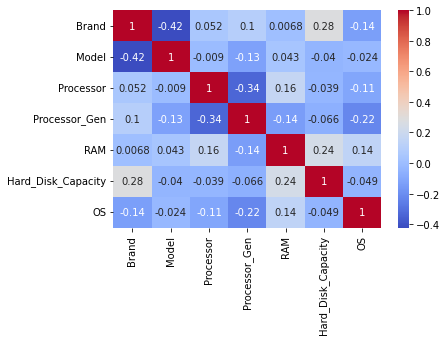

In [6]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')

As we can see, there is no high level of correlation between the features. So, we don't need to do anything.

### Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Training the model

In [9]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [10]:
forest.score(X_test, y_test)

0.5824879492863784